c:\Users\TheoA\Anaconda3\envs\iir-torch\Lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (4.0.3) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
-

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/spoken_mnist



-

hub://activeloop/spoken_mnist loaded successfully.



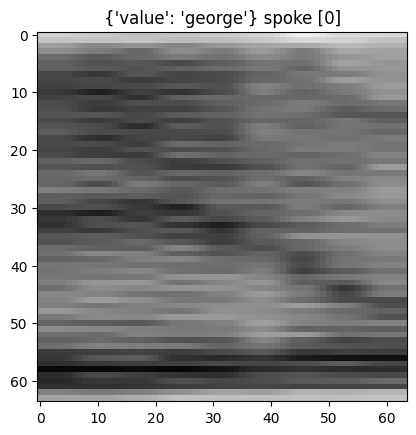

In [59]:
# https://github.com/Jakobovski/free-spoken-digit-dataset
import hub
ds = hub.load("hub://activeloop/spoken_mnist")
# check out the first spectrogram, it's label, and who spoke it!
import matplotlib.pyplot as plt
plt.imshow(ds.spectrograms[0].numpy())
plt.title(f"{ds.speakers[0].data()} spoke {ds.labels[0].numpy()}")
plt.show()

In [69]:
ds.visualize()

ModuleNotFoundError: No module named 'flask'

In [71]:
dl = ds.pytorch(num_workers = 8,
                                batch_size = 32,
                                tensors=['audio', 'labels'],
                                shuffle = True)

In [72]:
next(iter(dl))[0].shape

Please wait, filling up the shuffle buffer with samples.:   0%|          | 0.00/1.91G [00:16<?, ?B/s]


StopIteration: 

In [68]:
ds.audio[0].shape

(2384, 1)

In [64]:
for s in ds.pytorch():
    print(s)

In [61]:
from models.rc import SPCTRE_RC
from models.pqmf import PQMF

In [63]:
next(iter(ds.pytorch()))

StopIteration: 

In [ ]:
# train a model in pytorch
for sample in ds.pytorch():

In [17]:
import torch
from models.lfsr import Int8_LFSR
lfsr = Int8_LFSR(seed=torch.tensor(1))


c:\Users\TheoA\Documents\MIT\SENIORSLIDE\6.S965 Digital Systems Lab II\Final Proj\audio-rc-rtl\exploration\models\lfsr.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.poly_degrees = torch.tensor(polydegrees)


In [36]:
lfsr.gen_bit()

tensor([False])

In [56]:
lfsr.gen_n_int8s(100)

tensor([ 120,   24,  -82,   31, -116,   22,  101, -114, -115,   28, -104,  -20,
         -96,  -44,   29,   23,  111,  115,  -17,   49,   80,  105,   91,   27,
         -70,  -27,   73,   76,  -11, -123,  122, -125,  -41,    9,  -19,  -86,
          41,  127,   58,  -89,  -10,   20,   -2,   -9, -101,  125,   36,  -96,
          81,   99,  -90,  121, -105,   45,  -52,  -73,   58,   34, -120,  -91,
         -24,   19,   89, -128,  -61,  -13,   40,  -16,  -71,  116,  -51,   56,
         -71,  -15,  -77, -119,  -81,   21,  113,  116,   72,   70,    8,  -25,
          87,   75,   82,  -14,   34,   13,  -37,   89,    5,  -67,   66,   62,
          20,  123, -119,   42], dtype=torch.int8)

(array([103., 100., 103.,  99., 102.,  96., 102.,  95.,  99., 101.]),
 array([-128. , -102.5,  -77. ,  -51.5,  -26. ,   -0.5,   25. ,   50.5,
          76. ,  101.5,  127. ]),
 <BarContainer object of 10 artists>)

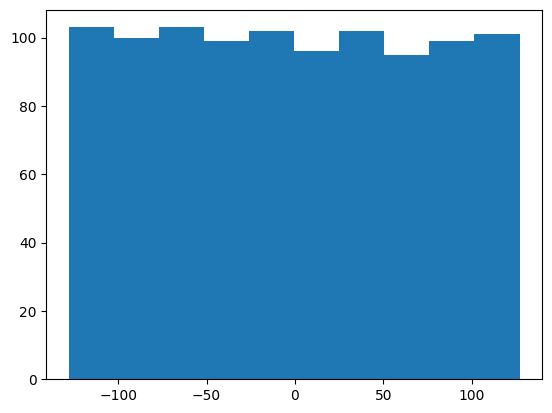

In [57]:
import matplotlib.pyplot as plt
plt.hist(lfsr.gen_n_int8s(1000).numpy())